In [1]:
%matplotlib notebook
from scipy.stats import rv_continuous
from scipy.interpolate import interp1d
from scipy.special import gamma
import numpy as np
import emcee
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
import probfit
from matplotlib.colors import LogNorm

# SF1 dissipation time = 140 Myr

In [2]:
path = "/data/OWN/SF1test/tdis140/output_00041"
SF1_140= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)
print "loaded"
cen = SF1_140.dm.Clumps.pos3d[SF1_140.dm.Clumps.cell==SF1_140.dm.Clumps.cell.max()]
SF1_140.center_shift(cen)
SF1_140.r_virial(600)
print "cutted"
nucenter = nbe.real_center(SF1_140.dm.pos3d, SF1_140.dm.mass)
SF1_140.center_shift(nucenter)
SF1_140.redefine(4.5)

loading Dark matter..
loading Stars..
loading Gas..
loaded
| r_200 = 230.2734375
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.439e+12 M_sun
| p_dm_200      =  9.271e+05 particles
| stellar mass  =  4.683e+10 M_sun
| p_st_200      =  1.772e+06 psrticles
| gas mass      =  2.254e+11 M_sun
| p_gs_200      =  2.257e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |18, 0, 0|
| D =| 0,10, 0|
|    | 0, 0, 1|
cutted


In [3]:
ok,SF1_140.dm.rho,_= CF.getDensity(np.array(SF1_140.dm.pos3d.reshape(len(SF1_140.dm.pos3d)*3),
                                    dtype=np.float32), SF1_140.dm.mass)

# SF1 dissipation time = 90 Myr 

In [4]:
path = "/data/OWN/SF1test/tdis90/output_00041"
SF1_90= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)
print "loaded"
cen = SF1_90.dm.Clumps.pos3d[SF1_90.dm.Clumps.cell==SF1_90.dm.Clumps.cell.max()]
SF1_90.center_shift(cen)
SF1_90.r_virial(600)
print "cutted"
nucenter = nbe.real_center(SF1_90.dm.pos3d, SF1_90.dm.mass)
SF1_90.center_shift(nucenter)
SF1_90.redefine(4.5)

loading Dark matter..
loading Stars..
loading Gas..
loaded
| r_200 = 230.2734375
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.439e+12 M_sun
| p_dm_200      =  9.272e+05 particles
| stellar mass  =  6.808e+10 M_sun
| p_st_200      =  2.439e+06 psrticles
| gas mass      =  2.042e+11 M_sun
| p_gs_200      =  2.266e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |17, 0, 0|
| D =| 0,11, 0|
|    | 0, 0, 1|
cutted


In [5]:
ok,SF1_90.dm.rho,_= CF.getDensity(np.array(SF1_90.dm.pos3d.reshape(len(SF1_90.dm.pos3d)*3),
                                    dtype=np.float32), SF1_90.dm.mass)

# SF1 dissipation time = 30 Myr 

In [6]:
path = "/data/OWN/SF1test/tdis30/output_00041"
SF1_30= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)
print "loaded"
cen = SF1_30.dm.Clumps.pos3d[SF1_30.dm.Clumps.cell==SF1_30.dm.Clumps.cell.max()]
SF1_30.center_shift(cen)
SF1_30.r_virial(600)
print "cutted"
nucenter = nbe.real_center(SF1_30.dm.pos3d, SF1_30.dm.mass)
SF1_30.center_shift(nucenter)
SF1_30.redefine(4.5)

loading Dark matter..
loading Stars..
loading Gas..
loaded
| r_200 = 230.2734375
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.440e+12 M_sun
| p_dm_200      =  9.276e+05 particles
| stellar mass  =  1.255e+11 M_sun
| p_st_200      =  4.215e+06 psrticles
| gas mass      =  1.468e+11 M_sun
| p_gs_200      =  2.280e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |18, 0, 0|
| D =| 0,16, 0|
|    | 0, 0, 2|
cutted


In [7]:
ok,SF1_30.dm.rho,_= CF.getDensity(np.array(SF1_30.dm.pos3d.reshape(len(SF1_30.dm.pos3d)*3),
                                    dtype=np.float32), SF1_30.dm.mass)

In [8]:
nucenter = nbe.real_center(SF1_30.dm.pos3d, SF1_30.dm.mass)
SF1_30.center_shift(nucenter)
SF1_30.redefine(4.5)

# SF1 dissipation time = 20 Myr

In [68]:
path = "/data/OWN/SF1test/tdis20ep49/output_00041"
SF1_20= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)
print "loaded"
cen = SF1_20.dm.Clumps.pos3d[SF1_20.dm.Clumps.cell==SF1_20.dm.Clumps.cell.max()]
SF1_20.center_shift(cen)
SF1_20.r_virial(600)
print "cutted"
nucenter = nbe.real_center(SF1_20.dm.pos3d, SF1_20.dm.mass)
SF1_20.center_shift(nucenter)
SF1_20.redefine(4.5)

loading Dark matter..
loading Stars..
loading Gas..
loaded
| r_200 = 230.2734375
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.439e+12 M_sun
| p_dm_200      =  9.269e+05 particles
| stellar mass  =  1.376e+11 M_sun
| p_st_200      =  4.847e+06 psrticles
| gas mass      =  1.348e+11 M_sun
| p_gs_200      =  2.260e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |18, 0, 0|
| D =| 0,17, 0|
|    | 0, 0, 2|
cutted


In [69]:
ok,SF1_20.dm.rho,_= CF.getDensity(np.array(SF1_20.dm.pos3d.reshape(len(SF1_20.dm.pos3d)*3),
                                    dtype=np.float32), SF1_20.dm.mass)

# SF1 dissipation time = 20 Myr $\epsilon_*$ = 0.5

In [60]:
path = "/data/OWN/SF1test/tdis20ep5/output_00041"
SF1_202= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)
print "loaded"
cen = SF1_202.dm.Clumps.pos3d[SF1_202.dm.Clumps.cell==SF1_202.dm.Clumps.cell.max()]
SF1_202.center_shift(cen)
SF1_202.r_virial(600)
print "cutted"
nucenter = nbe.real_center(SF1_202.dm.pos3d, SF1_202.dm.mass)
SF1_202.center_shift(nucenter)
SF1_202.redefine(4.5)

loading Dark matter..
loading Stars..
loading Gas..
loaded
| r_200 = 230.2734375
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.439e+12 M_sun
| p_dm_200      =  9.271e+05 particles
| stellar mass  =  1.371e+11 M_sun
| p_st_200      =  4.843e+06 psrticles
| gas mass      =  1.353e+11 M_sun
| p_gs_200      =  2.255e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |18, 0, 0|
| D =| 0,17, 0|
|    | 0, 0, 2|
cutted


In [61]:
ok,SF1_202.dm.rho,_= CF.getDensity(np.array(SF1_202.dm.pos3d.reshape(len(SF1_202.dm.pos3d)*3),
                                    dtype=np.float32), SF1_202.dm.mass)

# comparing 

<IPython.core.display.Javascript object>


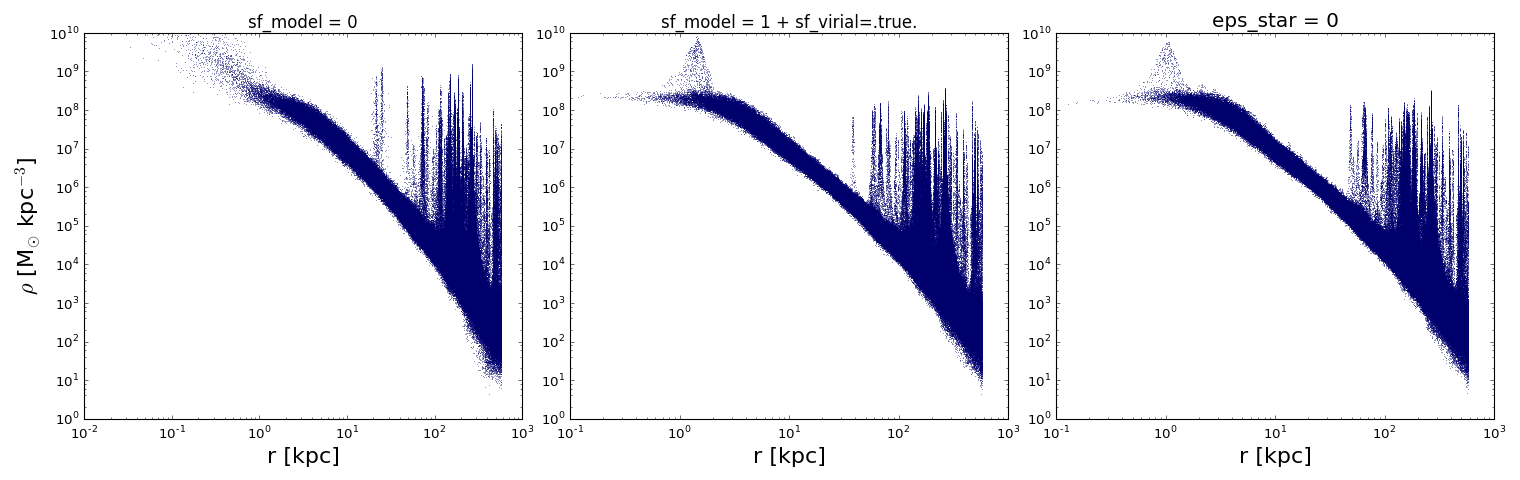

In [12]:
fig, ax= plt.subplots(1,3,figsize=[19,6])
ax[0].scatter(SF1_30.dm.r, SF1_30.dm.rho,s=0.5,alpha=0.5,lw=0)
ax[1].scatter(SF1_90.dm.r, SF1_90.dm.rho,s=0.5,alpha=0.5,lw=0)
ax[2].scatter(SF1_140.dm.r, SF1_140.dm.rho,s=0.5,alpha=0.5,lw=0)

#ax[2].scatter(haloNoSF.dm.r, haloNoSF.dm.rho,s=0.5,alpha=0.5,lw=0)
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_yscale("log")
ax[0].set_ylim([1e0,1e10])
ax[0].set_xlabel(r"r [kpc]",fontsize=20)
ax[1].set_xlabel(r"r [kpc]",fontsize=20)
ax[2].set_xlabel(r"r [kpc]",fontsize=20)
ax[0].set_ylabel(r"$\rho$ [M$_{\odot}$ kpc$^{-3}$]",fontsize=20)
ax[0].set_title("sf_model = 0",fontsize=15)
ax[1].set_title("sf_model = 1 + sf_virial=.true.",fontsize=15)
ax[2].set_title("eps_star = 0",fontsize=18)
plt.tight_layout(pad=1, w_pad=0)

####

In [13]:
def face_on_dm(sim,lims,points):
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.dm.pos3d[:,0], 
                                       sim.dm.pos3d[:,1],
                                       bins=(edges, edges),
                                       weights=sim.dm.mass)
    result = H.T
    return result, edges

def face_on_st(sim,lims,points,thikness=.5):
    disk = (np.abs(sim.st.pos3d[:,2])<thikness)
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.st.pos3d[disk,0], 
                                       sim.st.pos3d[disk,1],
                                       bins=(edges, edges),
                                       weights=sim.st.mass[disk])
    result = H.T
    return result, edges

def face_on_gs(sim,lims,points,thikness=.5):
    disk = (np.abs(sim.gs.pos3d[:,2])<thikness)
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.gs.pos3d[disk,0], 
                                       sim.gs.pos3d[disk,1],
                                       bins=(edges, edges),
                                       weights=sim.gs.mass[disk])
    result = H.T
    return result, edges

def edge_on_st(sim,lims,points):
    #disk = sim.st.pos3d[:,2]
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.st.pos3d[:,0], 
                                       sim.st.pos3d[:,2],
                                       bins=(edges, edges),
                                       weights=sim.st.mass)
    result = H.T
    return result, edges
    
def edge_on_gs(sim,lims,points):
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.gs.pos3d[:,0], 
                                       sim.gs.pos3d[:,2],
                                       bins=(edges, edges),
                                       weights=sim.gs.mass)
    result = H.T
    return result, edges
    

# Dark Matter 

<IPython.core.display.Javascript object>


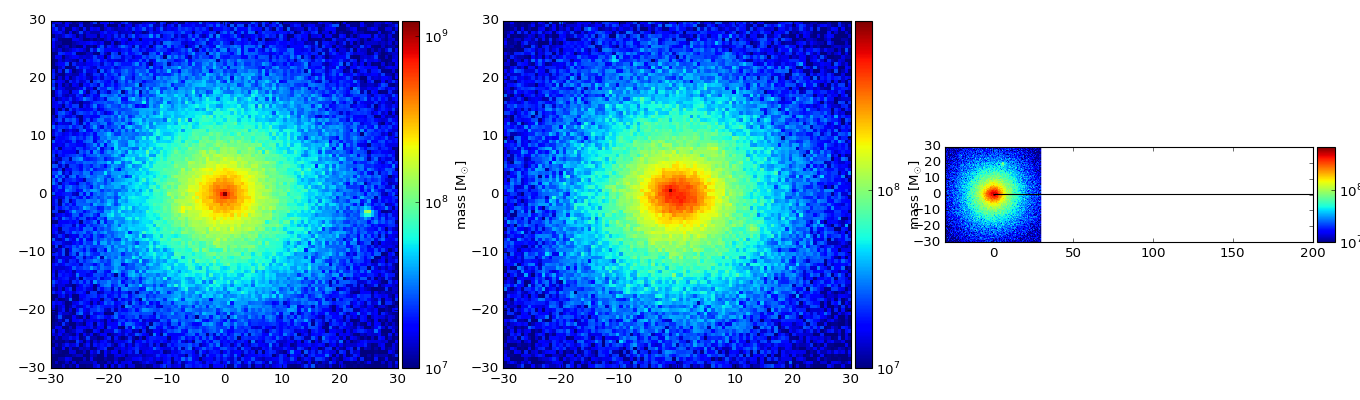

In [14]:
SF130_faceon, edges = face_on_dm(SF1_30,[-30,30],100)

SF190_faceon, edges = face_on_dm(SF1_90,[-30,30],100)

SF1140_faceon,_ = face_on_dm(SF1_140,[-30,30],100) 

#NoSF_faceon,_ = face_on_dm(haloNoSF,[-30,30],70)

fig,[ax,ax1,ax2] = plt.subplots(1,3,figsize=[17,5])
fig.tight_layout(w_pad=2)


mass_1 = ax.imshow(SF130_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e7)
                  )
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_2 = ax1.imshow(SF190_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e7)
                  )
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')


mass_3 = ax2.imshow(SF1140_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e7)
                  )
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_3,cax=cax,label=r'mass [M$_{\odot}$]')

# Stars
## Face on

<IPython.core.display.Javascript object>


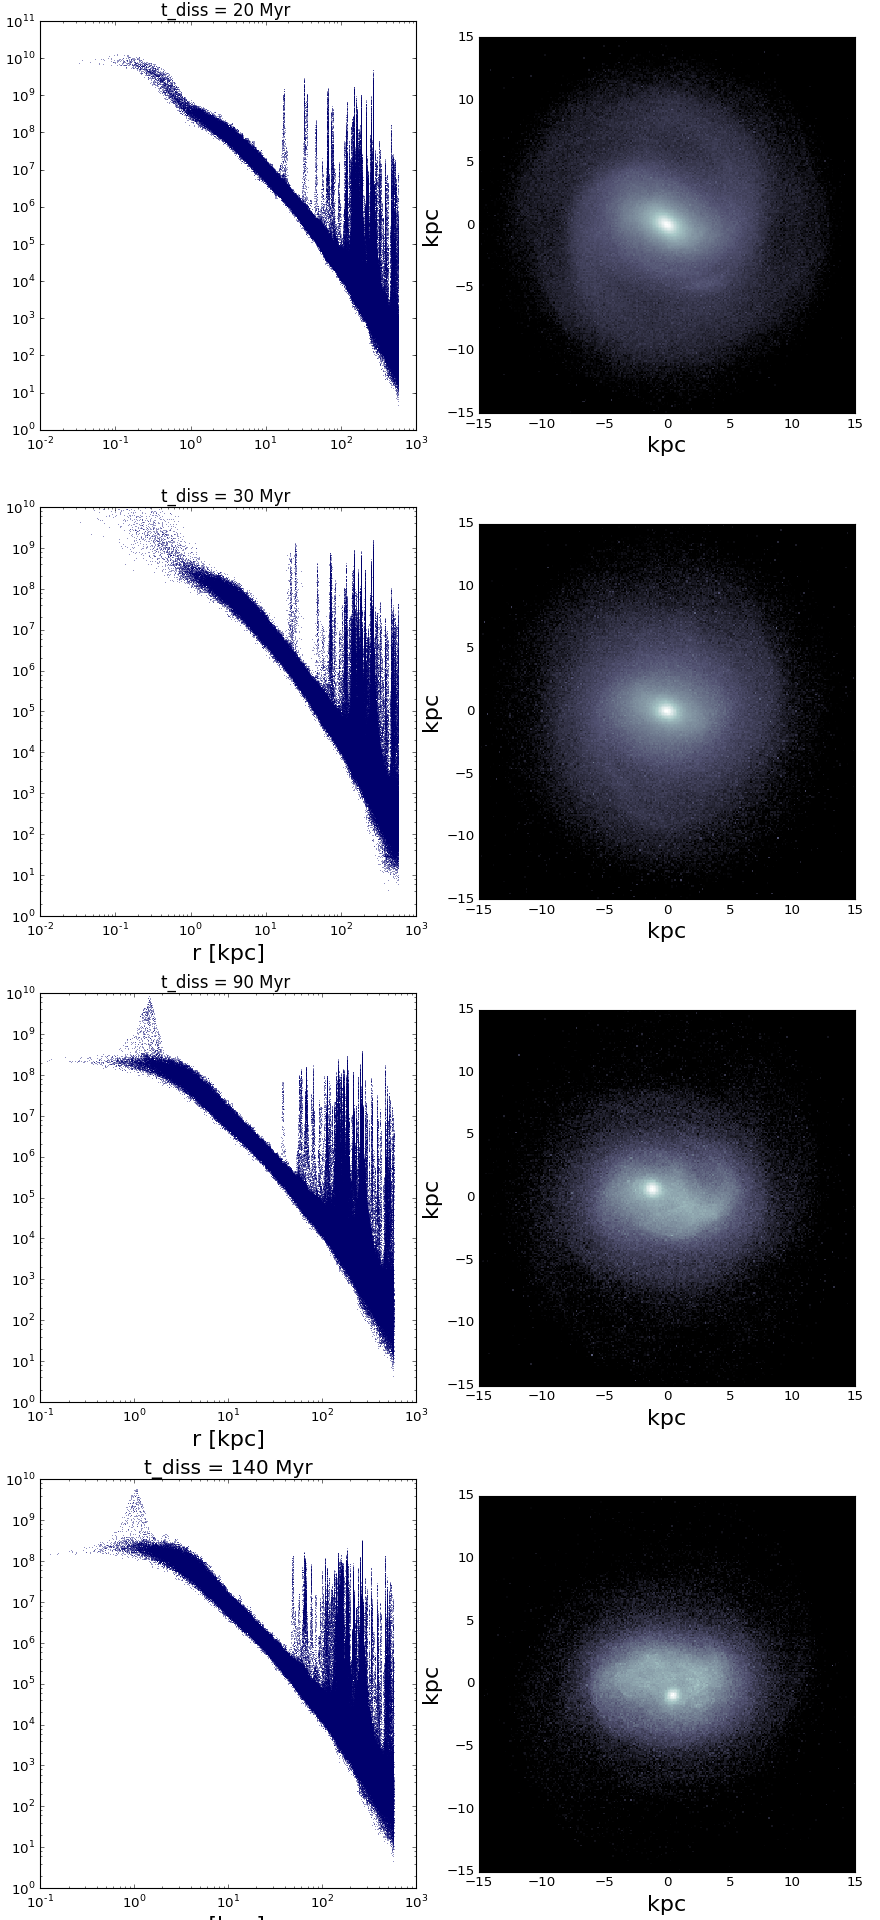

73784627.3125


In [32]:
length = 15
SF120_faceOn, edges = face_on_st(SF1_20,[-length,length],250)#H.T

SF130_faceOn, edges = face_on_st(SF1_30,[-length,length],250)#H.T

SF190_faceOn, edges = face_on_st(SF1_90,[-length,length],250)#H.T

SF1140_faceOn,_ = face_on_st(SF1_140,[-length,length],250)#H.T 



fig,[[ax01,ax11],[ax02,ax12],[ax03,ax13],[ax04,ax14]] = plt.subplots(4,2,figsize=[11,24])
fig.tight_layout(w_pad=2,h_pad=4)
print SF190_faceOn.max()
ax0.set_title("Dissipation time 30 Myr")
ax.set_title("Dissipation time 90 Myr")
ax1.set_title("Dissipation time 140 Myr")

mass_0 = ax11.imshow(SF120_faceOn+1e3, interpolation='nearest', origin='low',cmap='bone',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_0,cax=cax,label=r'mass [M$_{\odot}$]')




mass_0 = ax12.imshow(SF130_faceOn+1e3, interpolation='nearest', origin='low',cmap='bone',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_0,cax=cax,label=r'mass [M$_{\odot}$]')



mass_1 = ax13.imshow(SF190_faceOn+1e3, interpolation='nearest', origin='low',cmap='bone',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_2 = ax14.imshow(SF1140_faceOn+1e3, interpolation='nearest', origin='low',cmap='bone',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')
ax11.set_xlabel("kpc",fontsize=20)
ax12.set_xlabel("kpc",fontsize=20)
ax13.set_xlabel("kpc",fontsize=20)
ax14.set_xlabel("kpc",fontsize=20)
ax11.set_ylabel("kpc",fontsize=20)
ax12.set_ylabel("kpc",fontsize=20)
ax13.set_ylabel("kpc",fontsize=20)
ax14.set_ylabel("kpc",fontsize=20)

###########################33
ax01.scatter(SF1_20.dm.r, SF1_20.dm.rho,s=0.5,alpha=0.5,lw=0)
ax02.scatter(SF1_30.dm.r, SF1_30.dm.rho,s=0.5,alpha=0.5,lw=0)
ax03.scatter(SF1_90.dm.r, SF1_90.dm.rho,s=0.5,alpha=0.5,lw=0)
ax04.scatter(SF1_140.dm.r, SF1_140.dm.rho,s=0.5,alpha=0.5,lw=0)

#ax04.scatter(haloNoSF.dm.r, haloNoSF.dm.rho,s=0.5,alpha=0.5,lw=0)
ax01.set_xscale("log")
ax01.set_yscale("log")
ax02.set_xscale("log")
ax02.set_yscale("log")
ax03.set_xscale("log")
ax03.set_yscale("log")
ax04.set_xscale("log")
ax04.set_yscale("log")
ax02.set_ylim([1e0,1e10])
ax02.set_xlabel(r"r [kpc]",fontsize=20)
ax03.set_xlabel(r"r [kpc]",fontsize=20)
ax04.set_xlabel(r"r [kpc]",fontsize=20)
ax02.set_ylabel(r"$\rho$ [M$_{\odot}$ kpc$^{-3}$]",fontsize=20)
ax01.set_title("t_diss = 20 Myr ",fontsize=15)
ax02.set_title("t_diss = 30 Myr ",fontsize=15)
ax03.set_title("t_diss = 90 Myr ",fontsize=15)
ax04.set_title("t_diss = 140 Myr",fontsize=18)


## Edge on

<IPython.core.display.Javascript object>


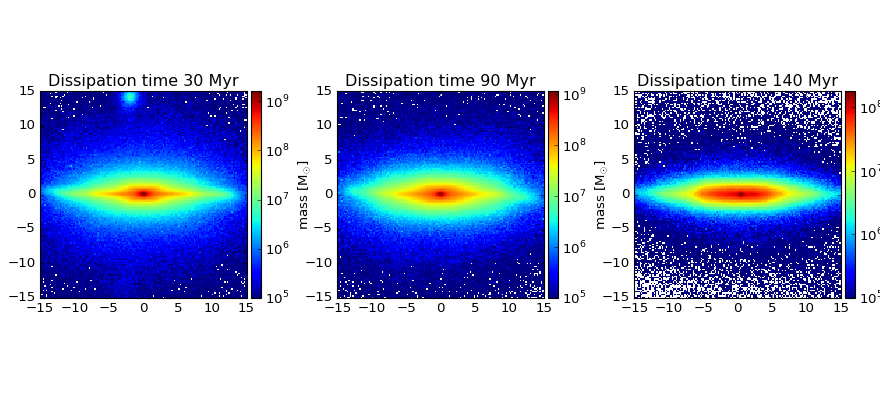

1151540662.88


In [59]:
length = 15. 
SF130_edgeOn, edges = edge_on_st(SF1_20,[-length,length],150)#H.T

SF190_edgeOn, edges = edge_on_st(SF1_30,[-length,length],150)#H.T

SF1140_edgeOn,_ = edge_on_st(SF1_140,[-length,length],150)#H.T 



fig,[ax0,ax,ax1] = plt.subplots(1,3,figsize=[11,5])
fig.tight_layout(w_pad=3)
print SF190_edgeOn.max()
ax0.set_title("Dissipation time 30 Myr")
ax.set_title("Dissipation time 90 Myr")
ax1.set_title("Dissipation time 140 Myr")

mass_0 = ax0.imshow(SF130_edgeOn, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_0,cax=cax,label=r'mass [M$_{\odot}$]')



mass_1 = ax.imshow(SF190_edgeOn, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_2 = ax1.imshow(SF1140_edgeOn, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')



# Gas
## Face on

<IPython.core.display.Javascript object>


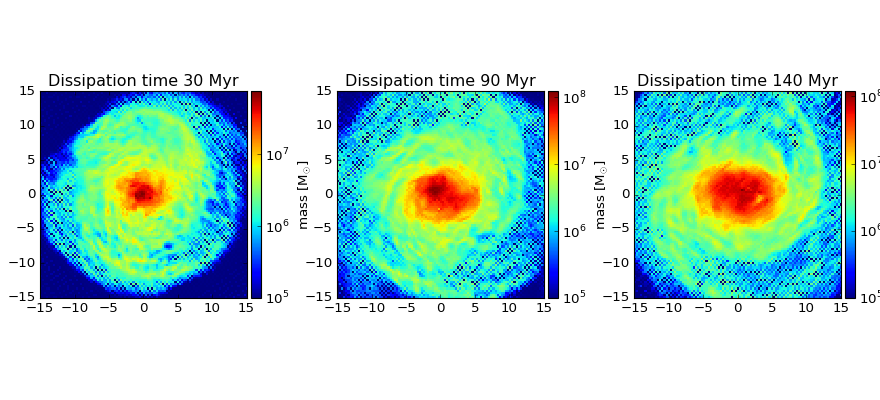

122072942.5


In [97]:
length = 15

SF130_faceOn, edges = face_on_gs(SF1_30,[-length,length],100)#H.T

SF190_faceOn, edges = face_on_gs(SF1_90,[-length,length],100)#H.T

SF1140_faceOn,_ = face_on_gs(SF1_140,[-length,length],100)#H.T 



fig,[ax0,ax,ax1] = plt.subplots(1,3,figsize=[11,5])
fig.tight_layout(w_pad=3)
print SF190_faceOn.max()
ax0.set_title("Dissipation time 30 Myr")
ax.set_title("Dissipation time 90 Myr")
ax1.set_title("Dissipation time 140 Myr")

mass_0 = ax0.imshow(SF130_faceOn+1e5, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_0,cax=cax,label=r'mass [M$_{\odot}$]')



mass_1 = ax.imshow(SF190_faceOn+1e5, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_2 = ax1.imshow(SF1140_faceOn+1e5, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')

## Edge on

<IPython.core.display.Javascript object>


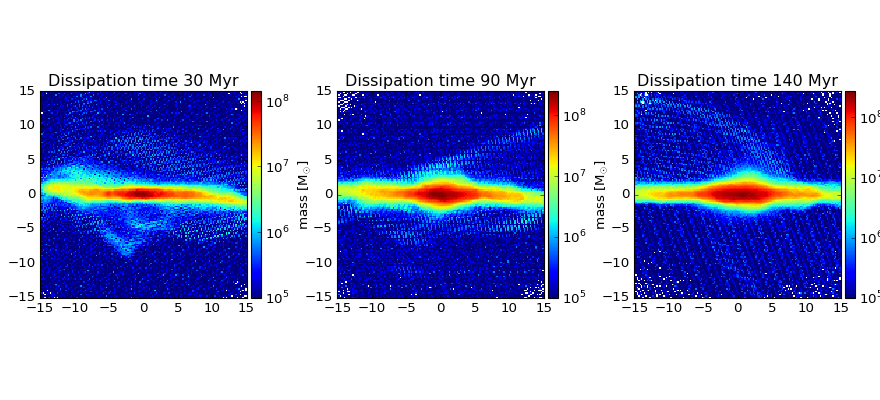

244116580.121


In [54]:
length = 15. 
SF130_edgeOn, edges = edge_on_gs(SF1_30,[-length,length],150)#H.T

SF190_edgeOn, edges = edge_on_gs(SF1_90,[-length,length],150)#H.T

SF1140_edgeOn,_ = edge_on_gs(SF1_140,[-length,length],150)#H.T 



fig,[ax0,ax,ax1] = plt.subplots(1,3,figsize=[11,5])
fig.tight_layout(w_pad=3)
print SF190_edgeOn.max()
ax0.set_title("Dissipation time 30 Myr")
ax.set_title("Dissipation time 90 Myr")
ax1.set_title("Dissipation time 140 Myr")

mass_0 = ax0.imshow(SF130_edgeOn, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_0,cax=cax,label=r'mass [M$_{\odot}$]')



mass_1 = ax.imshow(SF190_edgeOn, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_2 = ax1.imshow(SF1140_edgeOn, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')




select at least 1 object, 2 would be great.
do:
simulate:
- dmo
- dm+hydro(NostarsNocooling):

/scratch/enezri/Arturo/NewSchool/Mochima/Midres/Mo_hydro_h2_NOstars_NOcooling
- dm+hydro(SF0)=============> done

- dm+hydro(SF1+t_diss=30)=============> done

/scratch/enezri/Arturo/NewSchool/Mochima/Midres/Mo_hydro_h2_SF1_tdis_30
- dm+hydro(SF1+t_diss=90)=============> done

/scratch/enezri/Arturo/NewSchool/Mochima/Midres/Mo_hydro_h2_SF1_tdis_90
- dm+hydro(SF1+t_diss=140)=============> done

/scratch/enezri/Arturo/NewSchool/Mochima/Midres/Mo_hydro_h2_SF1_tdis_140
- NO feedback??!!!



plot:
- edge on view (Stars and DM / glnemo or 2dhist)
- dm profile
- Virial criteria (springel angular momentum story)
- Moster plot
- SFr plot (like the ones in pol's thesis)


In [33]:
## halo, levelmax, t_diss, halo_mass, star_mass, gas_mass

one_array = np.array([["h2", '^', 'r', 15, 150, 1.081e+12, 3.345e+10, 1.678e+11],
                      ["h2", 's', 'r', 16, 110, 1.081e+12, 4.522e+10, 1.560e+11],
                      ["h2", 'o', 'b', 14, 40, 1.081e+12, 8.832e+10, 1.129e+11],
                      ["h2", 'd', 'r', 17, 140, 1.081e+12, 3.978e+10, 1.615e+11],
                      ["h2", 'o', 'g', 14, 20, 1.080e+12, 1.149e+11, 8.631e+10],
                      ["h2", 'd', 'r', 17, 130, 1.081e+12, 4.179e+10, 1.594e+11],
                      ["h2", 's', 'r', 16, 133,1.081e+12, 3.810e+10, 1.632e+11],
                      ["h2", 'o', 'g', 14, 12, 1.080e+12, 1.292e+11, 7.207e+10],
                      ["h2", '^', 'r', 15, 99, 1.081e+12, 4.380e+10, 1.575e+11],
                      ["h2", 'o', 'r', 14, 200, 1.081e+12, 2.595e+10, 1.753e+11],
                      ["h2", 'o', 'g', 14, 15, 1.080e+12, 1.232e+11, 7.810e+10],
                     ])


In [34]:
# Moster et all
def M_1(z):
    M10 ,M11 = 11.590, 1.195
    log = M10 + M11*(z / (z+1))
    return 10**(log)

def N(z):
    N10 ,N11 = 0.0351, -0.0247
    return N10 + N11*(z / (z+1))


def beta(z):
    B10 ,B11 = 1.376, -0.826
    return B10 + B11*(z / (z+1))


def gamma(z):
    G10 ,G11 = 0.608, 0.329
    return G10 + G11*(z / (z+1))

def mm(M,z=0):
    one = ( M / M_1(z))**(-beta(z))
    two = ( M / M_1(z))**gamma(z)
    return 2*N(z) * M / (one +two)

def alpha(m):
    return 0.15 / np.log10(m)

M = np.logspace(10,14,50)
m = mm(M)
al = np.sqrt(m)#alpha(m)

In [45]:
g20 = SF1_20.gs.mass[(SF1_20.gs.R < 10.)&(np.abs(SF1_20.gs.pos3d[:,2])<2.)].sum()
s20 = SF1_20.st.mass[(SF1_20.st.R < 10.)&(np.abs(SF1_20.st.pos3d[:,2])<2.)].sum()
g30 = SF1_20.gs.mass[(SF1_30.gs.R < 10.)&(np.abs(SF1_30.gs.pos3d[:,2])<2.)].sum()
s30 = SF1_20.st.mass[(SF1_30.st.R < 10.)&(np.abs(SF1_30.st.pos3d[:,2])<2.)].sum()
g90 = SF1_20.gs.mass[(SF1_90.gs.R < 10.)&(np.abs(SF1_90.gs.pos3d[:,2])<2.)].sum()
s90 = SF1_20.st.mass[(SF1_90.st.R < 10.)&(np.abs(SF1_90.st.pos3d[:,2])<2.)].sum()
g140 = SF1_20.gs.mass[(SF1_140.gs.R < 10.)&(np.abs(SF1_140.gs.pos3d[:,2])<2.)].sum()
s140 = SF1_20.st.mass[(SF1_140.st.R < 10.)&(np.abs(SF1_140.st.pos3d[:,2])<2.)].sum()

<IPython.core.display.Javascript object>


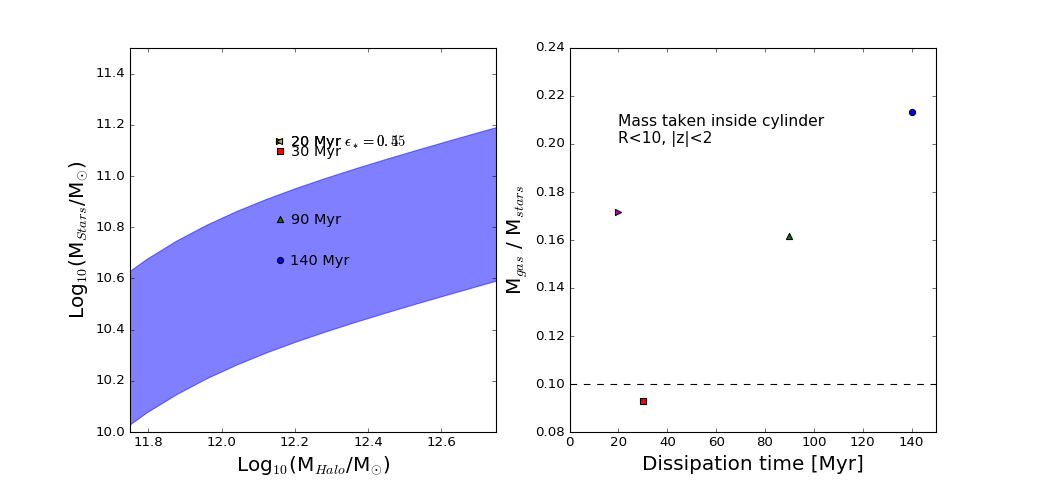

In [70]:
fig, [ax,ax1] = plt.subplots(1,2,figsize = [13,6])
ax.set_xlim(11.75,12.75)
ax.set_ylim(10,11.5)
ax.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)

ax.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
x = 0.03
y = -.02
ax.scatter(np.log10(SF1_20.dm.total_m),np.log10(SF1_20.st.total_m),marker='>',c='m',s=30)
ax.text(np.log10(SF1_20.dm.total_m)+x,np.log10(SF1_20.st.total_m)+y,'20 Myr $\epsilon_* = 0.45$',fontsize=13)
ax.scatter(np.log10(SF1_202.dm.total_m),np.log10(SF1_202.st.total_m),marker='<',c='y',s=30)
ax.text(np.log10(SF1_202.dm.total_m)+x,np.log10(SF1_202.st.total_m)+y,r'20 Myr $\epsilon_* = 0.5$',fontsize=13)
ax.scatter(np.log10(SF1_30.dm.total_m),np.log10(SF1_30.st.total_m),marker='s',c='r',s=30)
ax.text(np.log10(SF1_30.dm.total_m)+x,np.log10(SF1_30.st.total_m)+y,'30 Myr',fontsize=13)
ax.scatter(np.log10(SF1_90.dm.total_m),np.log10(SF1_90.st.total_m),marker='^',c='g',s=30)
ax.text(np.log10(SF1_90.dm.total_m)+x,np.log10(SF1_90.st.total_m)+y,'90 Myr',fontsize=13)
ax.scatter(np.log10(SF1_140.dm.total_m),np.log10(SF1_140.st.total_m),marker='o',c='b',s=30)
ax.text(np.log10(SF1_140.dm.total_m)+x,np.log10(SF1_140.st.total_m)+y,'140 Myr',fontsize=13)
############################################################################################
ax1.set_ylabel(r"M$_{gas}$ / M$_{stars}$",fontsize=18)
ax1.set_xlabel("Dissipation time [Myr]",fontsize=18)
ax1.text(20,0.20,"Mass taken inside cylinder\nR<{0}, |z|<{1}".format(10,2),fontsize=14)
ax1.hlines(xmin=0,xmax=200,y=0.1,linestyles='--')
ax1.set_xlim([0,150])
ax1.scatter(20,g20/s20,marker='>',c='m',s=30)
ax1.scatter(30,g30/s30,marker='s',c='r',s=30)
ax1.scatter(90,g90/s90,marker='^',c='g',s=30)
ax1.scatter(140,g140/s140,marker='o',c='b',s=30)


<IPython.core.display.Javascript object>


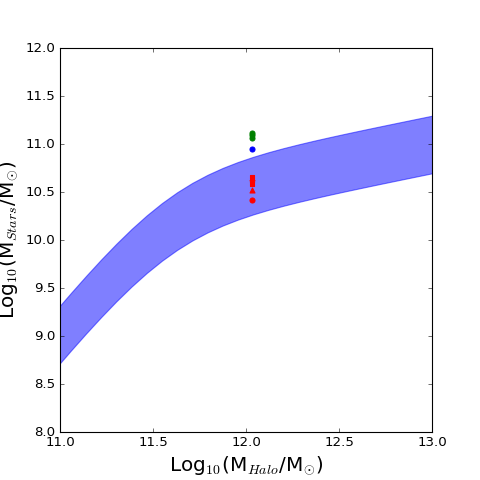

In [59]:
fig, ax = plt.subplots(figsize = [6,6])
ax.set_xlim(11,13)
ax.set_ylim(8,12)
ax.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)

ax.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
for i in range(len(one_array)):
    ax.scatter(np.log10(np.float32(one_array[i,5])),
               np.log10(np.float32(one_array[i,6])),
               marker = np.array(one_array[:,1],dtype=str)[i],
               color = np.array(one_array[:,2],dtype=str)[i]
              )

In [76]:
np.array(one_array[:,1],dtype=str)[1]

's'